In [6]:
!pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 32.4 MB/s eta 0:00:00


In [7]:
import os
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import shap

from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [8]:
path = '/content/drive/My Drive/Colab Notebooks/job_satisfaction_project'

In [9]:
X = pd.DataFrame()

for i in range(0, 10):
  new = pd.read_csv(f"{path}/shap/x_{i}.csv")
  X = pd.concat([X, new])

In [10]:
X.shape

(11630, 27)

In [11]:
shap_values = np.load(f'{path}/shap/shap_values_0.npy')

for i in range(1, 10):
  new = np.load(f'{path}/shap/shap_values_{i}.npy')
  shap_values = np.concatenate([shap_values, new])

In [12]:
len(shap_values)

11630

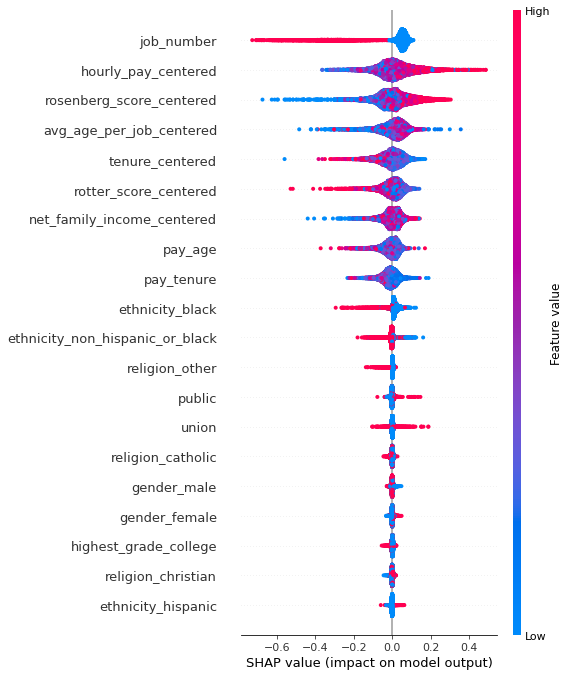

In [13]:
shap.summary_plot(shap_values, X)

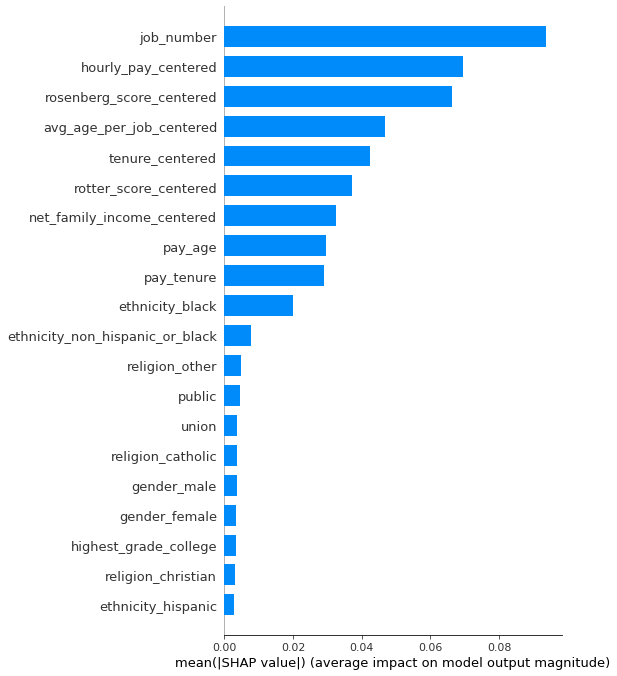

In [37]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [92]:
def plot_interaction_dependence_plot(main_var, interaction, var_name):
  fig = plt.figure(figsize=(12, 12))

  gs = gridspec.GridSpec(5, 5)
  ax_main = plt.subplot(gs[1:5, :4])
  ax_xDist = plt.subplot(gs[0, :4])
  ax_yDist = plt.subplot(gs[1:5, 4])
    
  # lowess
  idx = np.where(X.columns==main_var)[0][0]
  x = X.iloc[:,idx]
  y_sv = shap_values[:,idx]
  lowess = sm.nonparametric.lowess(y_sv, x, frac=.3)
  ax_main.plot(*list(zip(*lowess)), color="#312D2C", linestyle="dashed", )

  # shap
  shap.dependence_plot(main_var,
                      shap_values,
                      X,
                      interaction_index=interaction,
                      alpha=0.5,
                      dot_size=10,
                      show=False,
                      ax=ax_main)

  ax_main.set_xlabel(var_name, fontsize=14)
  ax_main.set_ylabel('', fontsize=14)

  # histplots
  ax_xDist.hist(X[main_var], bins=50, edgecolor="black", color="gray")
  ax_yDist.hist(X[interaction], orientation="horizontal", bins=50, edgecolor="black", color="gray")

  plt.show()

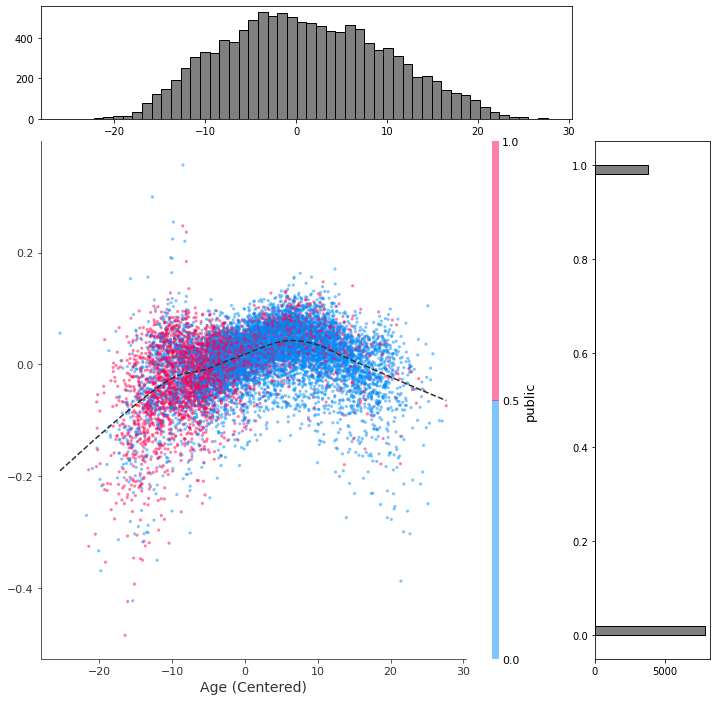

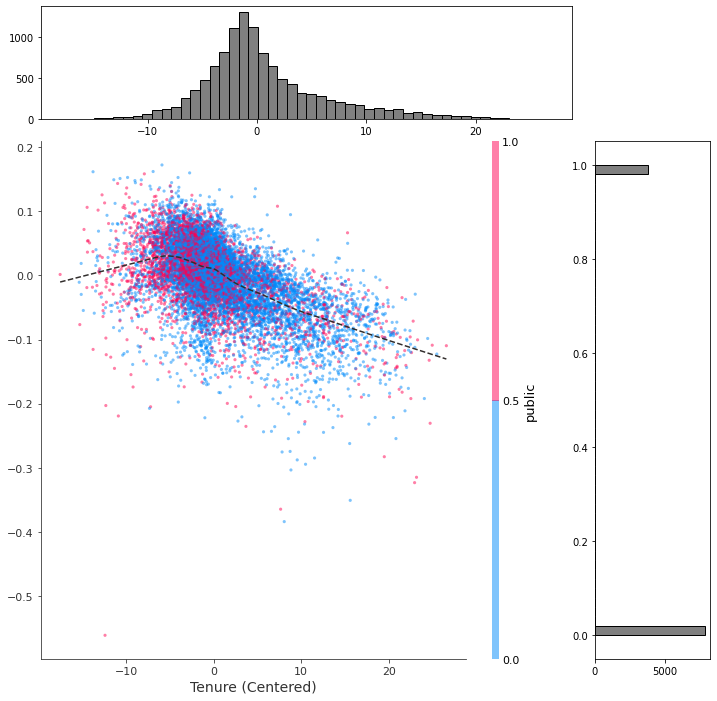

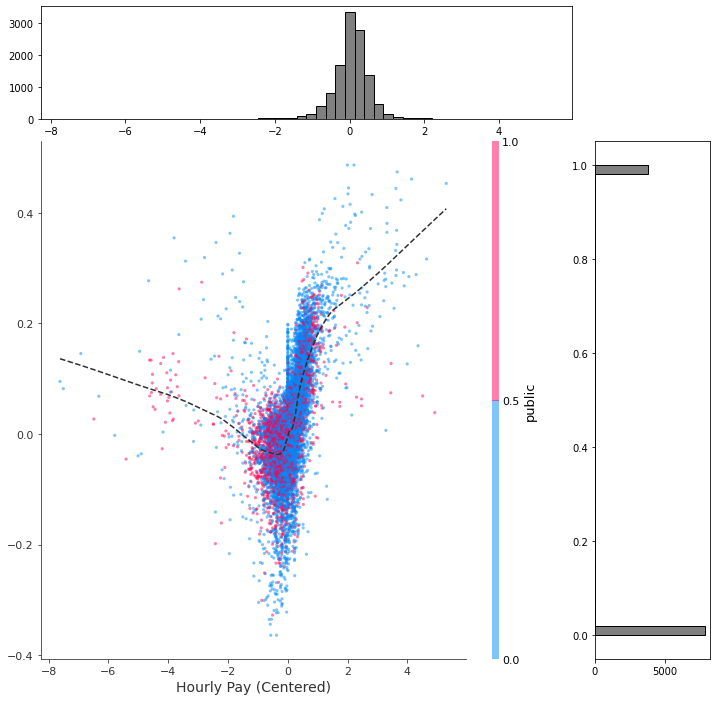

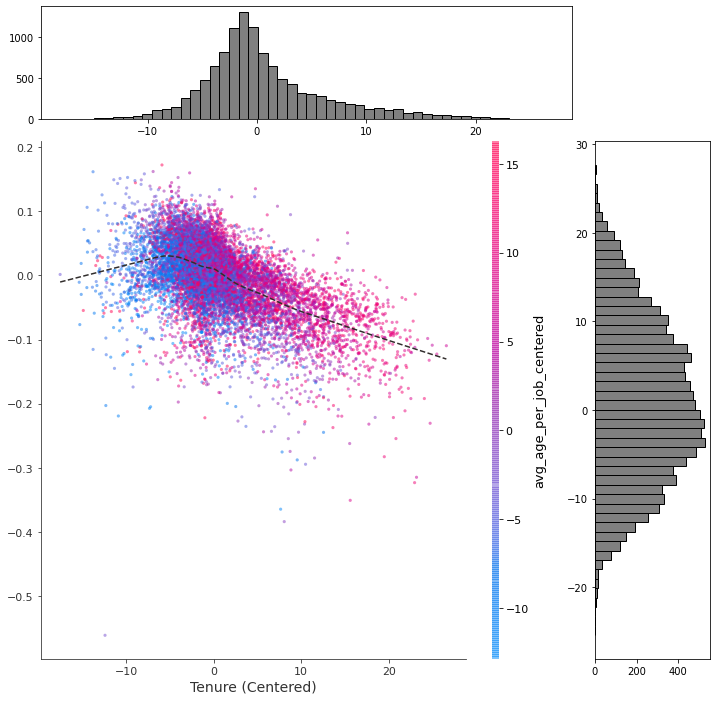

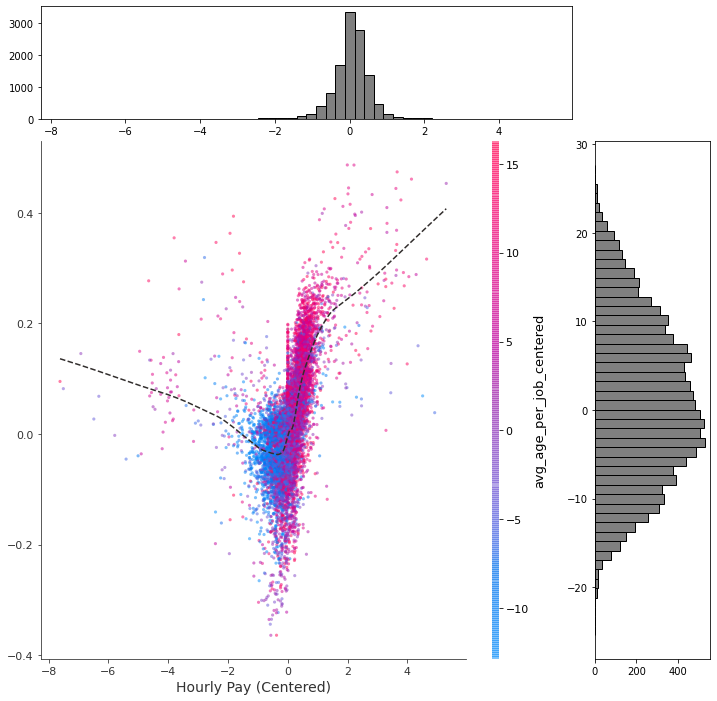

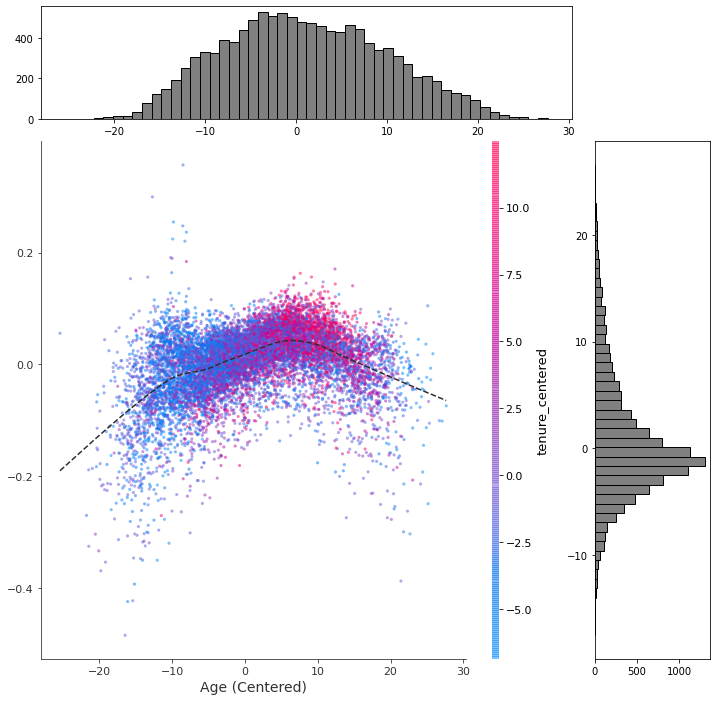

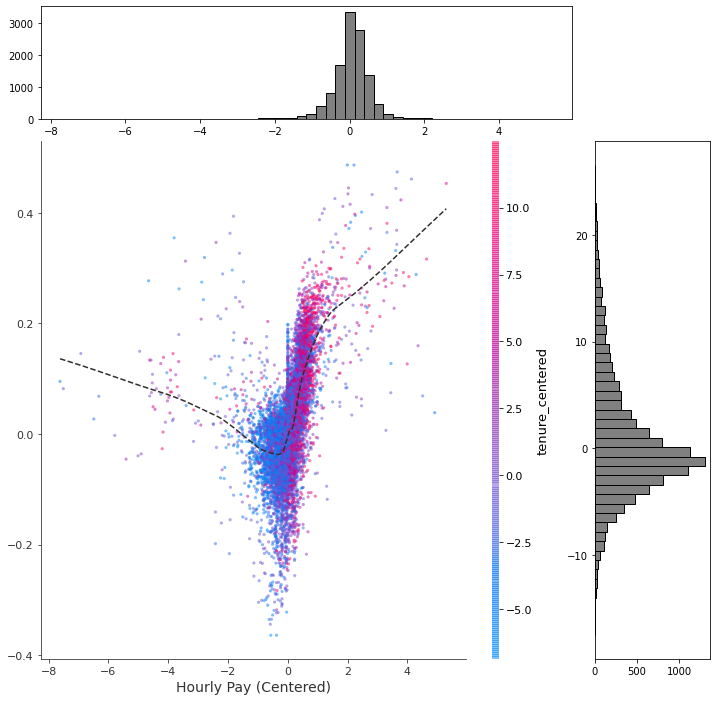

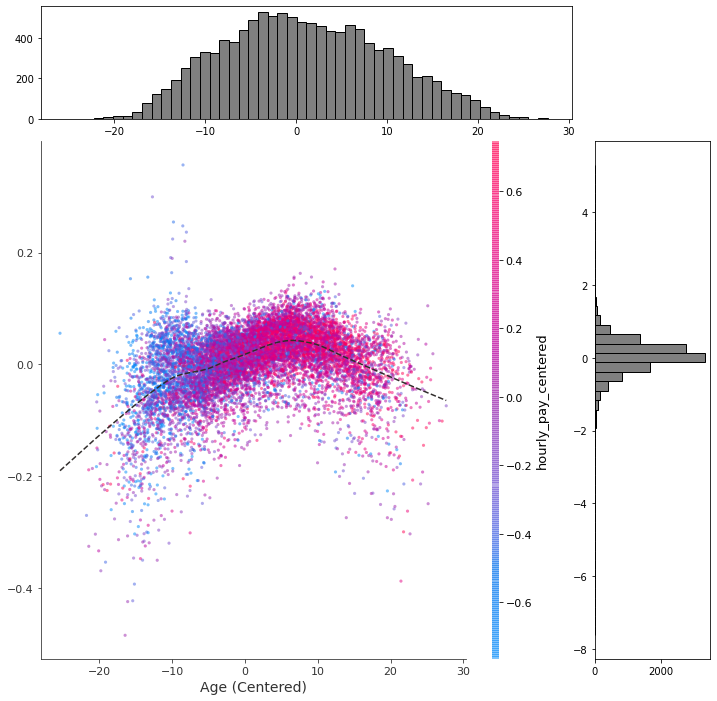

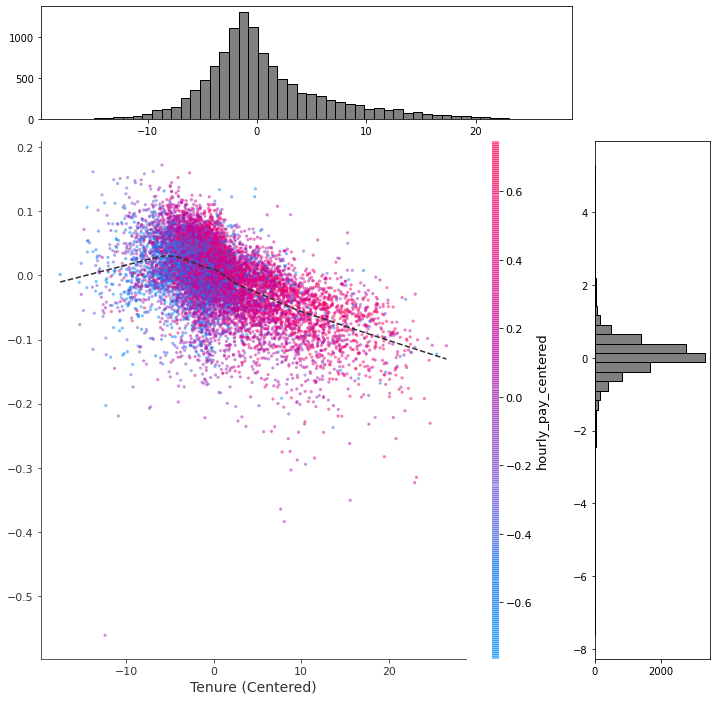

In [94]:
for f in ['public', 'avg_age_per_job_centered', 'tenure_centered', 'hourly_pay_centered']:
  for v in ['avg_age_per_job_centered', 'tenure_centered', 'hourly_pay_centered']:
    if f != v:
      if v == 'avg_age_per_job_centered':
        var_name = 'Age (Centered)'
      elif v == 'tenure_centered':
        var_name = 'Tenure (Centered)'
      elif v == 'hourly_pay_centered':
        var_name = 'Hourly Pay (Centered)'
      plot_interaction_dependence_plot(main_var=v,
                                       interaction=f, 
                                       var_name=var_name)
      print()